In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
gdp = pd.read_excel('./data/GDP_percapita.xls')
gdp.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602596,24985.993281,24713.698045,25025.099563,25533.56978,25796.380251,25239.600411,25630.266492,NaN,NaN


In [4]:
gdp = gdp[['Country Name', '2015', '2016', '2017', '2018']]

In [5]:
gdp = gdp.dropna(thresh=3)

In [6]:
gdp['average'] = gdp.iloc[:, 1:].astype(float).mean(axis=1)

In [7]:
gdp = gdp.sort_values('average', ascending=False)
gdp.head()

,Country Name,2015,2016,2017,2018,average
147,Monaco,165937.865343,169915.804840,167101.759377,185741.279992,172174.177388
135,Liechtenstein,167290.939984,165028.245029,NaN,NaN,166159.592507
142,Luxembourg,101376.496574,104278.390972,107361.306947,116639.888047,107414.020635
35,Switzerland,82081.609206,80172.193304,80450.045820,82796.547163,81375.098873
106,Isle of Man,81606.280033,79155.541672,80989.172211,NaN,80583.664639


In [8]:
gdp['rank'] = gdp.average.rank(ascending=0).astype(int)

In [9]:
gdp.tail()

,Country Name,2015,2016,2017,2018,average,rank
32,Central African Republic,377.271254,401.918238,449.786424,475.721251,426.174292,246
171,Niger,360.853384,362.131132,375.869490,413.980305,378.208578,247
166,Malawi,380.597033,315.777326,356.717573,389.398033,360.622491,248
211,Somalia,293.455236,295.967852,309.055355,314.544166,303.255652,249
14,Burundi,305.549773,282.193130,292.997631,271.752044,288.123145,250


In [10]:
whr15 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2015.csv')

In [11]:
gdp = gdp.rename(columns={'Country Name' : 'Country'})

In [26]:
gdp_whr15 = gdp.merge(whr15, on='Country', how='inner')
gdp_whr15.head()

,Country,2015,2016,2017,2018,average,rank,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Luxembourg,101376.496574,104278.390972,107361.306947,116639.888047,107414.020635,3,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
1,Switzerland,82081.609206,80172.193304,80450.045820,82796.547163,81375.098873,4,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Norway,74355.515858,70460.560532,75496.754058,81697.245984,75502.519108,8,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
3,Ireland,61995.422779,63197.082374,69649.882740,78806.431996,68412.204972,9,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
4,Iceland,52428.595763,61757.949306,71314.774196,73191.116315,64673.108895,10,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [13]:
gdp_whr15['dystopia_rank'] = gdp_whr15['Dystopia Residual'].rank(ascending=False)

Text(0.5, 1.0, 'GDP per Capita vs Happiness Rank')

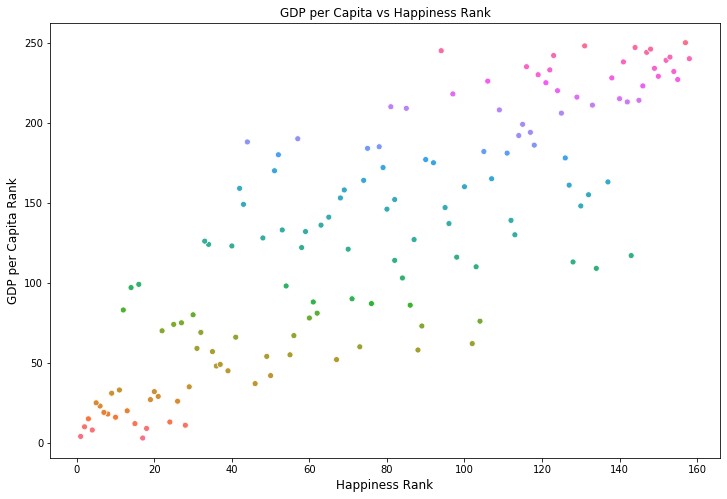

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=gdp_whr15, x='Happiness Rank', y='rank', hue='Country', legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('GDP per Capita Rank', fontsize=12)
plt.title('GDP per Capita vs Happiness Rank')

Text(0.5, 1.0, 'GDP per Capita vs Dystopia Rank')

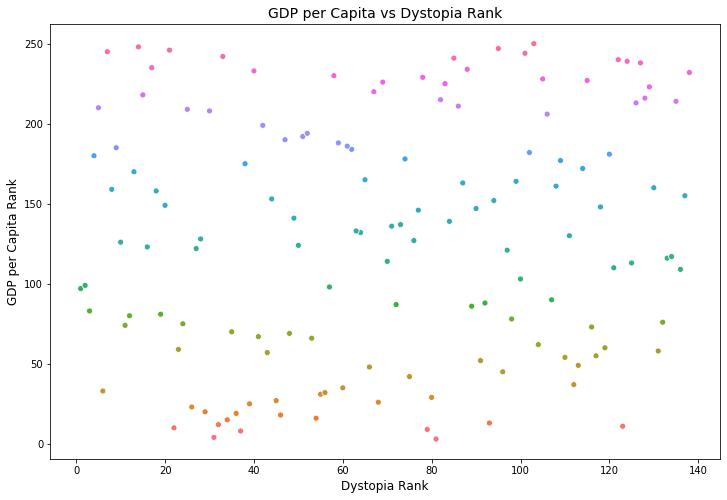

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=gdp_whr15, x='dystopia_rank', y='rank', hue='Country', legend=False)
plt.xlabel('Dystopia Rank', fontsize=12)
plt.ylabel('GDP per Capita Rank', fontsize=12)
plt.title('GDP per Capita vs Dystopia Rank', fontsize=14)

In [19]:
gdp.average.mean()

15640.914619274712

In [20]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand', 
'Australia', 'Sweden', 'Austria')

gdp_top = gdp.loc[gdp['Country'].isin(top_countries)]

Text(0.5, 1.0, 'GDP per Capita of Happiest Countries')

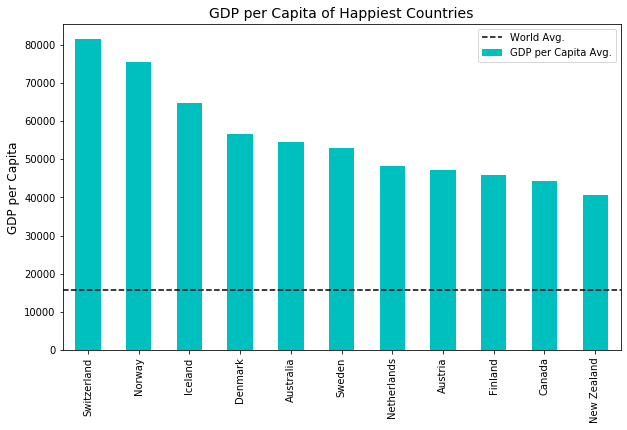

In [21]:
gdp_top.plot(kind='bar', x='Country', y='average', color='c', figsize=(10,6))
plt.axhline(y=15641, color='black', linestyle='--')

plt.legend(labels=('World Avg.', 'GDP per Capita Avg.'))
plt.xlabel('')
plt.ylabel('GDP per Capita', fontsize=12)
plt.title('GDP per Capita of Happiest Countries', fontsize=14)

In [22]:
bottom_countries = ('Togo', 'Burundi', 'Syria', 'Benin', 'Rwanda', 'Afghanistan', 'Burkina Faso', 'Ivory Coast', 'Guinea',
'Chad', 'Liberia', 'Tanzania', 'Madagascar', 'Central African Republic', 'South Sudan', 'Yemen', 'Haiti', 'Malawi', 'Botswana')

gdp_bottom = gdp.loc[gdp['Country'].isin(bottom_countries)]

Text(0.5, 1.0, 'GDP per Capita of Least Happiest Countries')

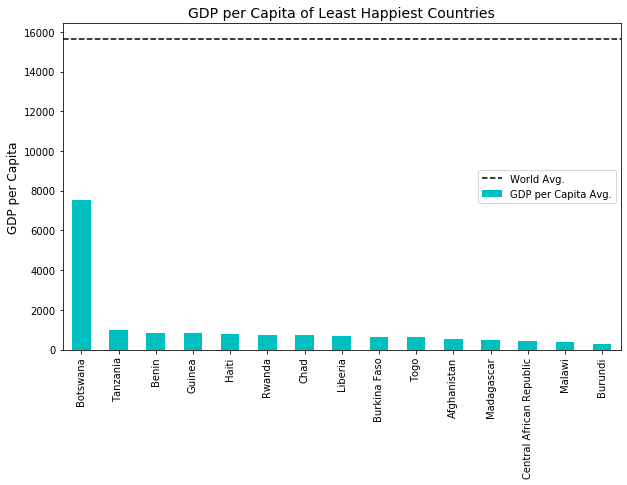

In [23]:
gdp_bottom.plot(kind='bar', x='Country', y='average', color='c', figsize=(10,6))
plt.axhline(y=15641, color='black', linestyle='--')
plt.legend(labels=('World Avg.', 'GDP per Capita Avg.'))
plt.xlabel('')
plt.ylabel('GDP per Capita', fontsize=12)
plt.title('GDP per Capita of Least Happiest Countries', fontsize=14)

In [25]:
data = dict(type = 'choropleth', 
           locations = gdp['Country'],
           locationmode = 'country names',
           z = gdp['average'], 
           text = gdp['Country'],
           colorbar = {'title':'GDP per Capita'},                              
           colorscale = 'Spectral',
           )
layout = dict(title = 'Average GDP per Capita', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)


In [27]:
gdp.sort_values('rank', ascending=True)

,Country,2015,2016,2017,2018,average,rank
147,Monaco,165937.865343,169915.804840,167101.759377,185741.279992,172174.177388,1
135,Liechtenstein,167290.939984,165028.245029,NaN,NaN,166159.592507,2
142,Luxembourg,101376.496574,104278.390972,107361.306947,116639.888047,107414.020635,3
35,Switzerland,82081.609206,80172.193304,80450.045820,82796.547163,81375.098873,4
106,Isle of Man,81606.280033,79155.541672,80989.172211,NaN,80583.664639,5
144,"Macao SAR, China",75340.986981,74061.086035,81516.674925,87208.535913,79531.820963,6
50,Cayman Islands,76280.486253,78296.099927,81124.513479,NaN,78567.033220,7
175,Norway,74355.515858,70460.560532,75496.754058,81697.245984,75502.519108,8
109,Ireland,61995.422779,63197.082374,69649.882740,78806.431996,68412.204972,9
112,Iceland,52428.595763,61757.949306,71314.774196,73191.116315,64673.108895,10
